# Predict survival on the Titanic ship

In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


In [102]:
dt = pd.read_csv("C:/Users/Akshay/Documents/IIT/Machine Learning iit/Project/version4.csv")

In [66]:
# see few rows
dt.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class
0,3,1,22,1,0,7,3,0
1,1,0,38,1,0,71,0,1
2,3,0,26,0,0,7,3,1
3,1,0,35,1,0,53,3,1


In [67]:
# info

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null int64
Class       891 non-null int64
dtypes: int64(8)
memory usage: 55.8 KB


First some basic questions:
1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?
Then we'll dig deeper, with a broader question:
5.) What factors helped someone survive the sinking?

In [68]:
types = dt.dtypes
print(types)

Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Embarked    int64
Class       int64
dtype: object


In [69]:
# who were the passengers 

dt.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class
0,3,1,22,1,0,7,3,0
1,1,0,38,1,0,71,0,1
2,3,0,26,0,0,7,3,1
3,1,0,35,1,0,53,3,1


In [70]:
dt.columns 

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Class'], dtype='object')

In [71]:
# read the specific columns 
DataFrame(dt, columns=['Survived','Sex','Age','Embarked'])

,Survived,Sex,Age,Embarked
0,NaN,1,22,3
1,NaN,0,38,0
2,NaN,0,26,3
3,NaN,0,35,3
4,NaN,1,35,3
5,NaN,1,29,2
6,NaN,1,54,3
7,NaN,1,2,3
8,NaN,0,27,3
9,NaN,0,14,0


Passengers:

#Age
#Sex
#Embarked 




In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

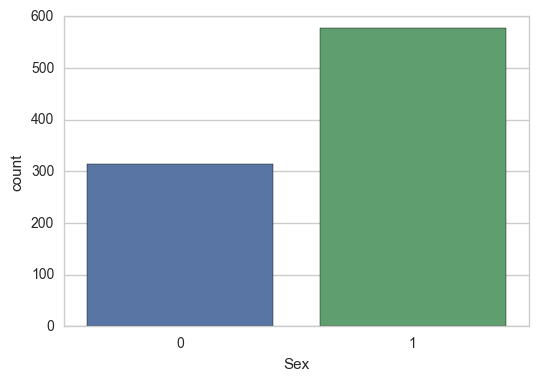

In [73]:
sns.countplot(x='Sex',data= dt)

In [74]:
dt.count(axis = 0)

Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
Class       891
dtype: int64

In [75]:
print(dt.groupby('Sex').size())

Sex
0    314
1    577
dtype: int64


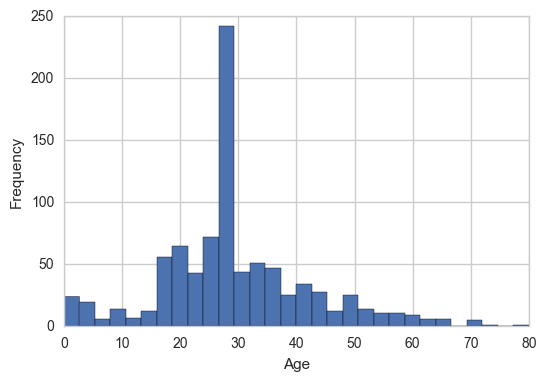

In [76]:

dt['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')

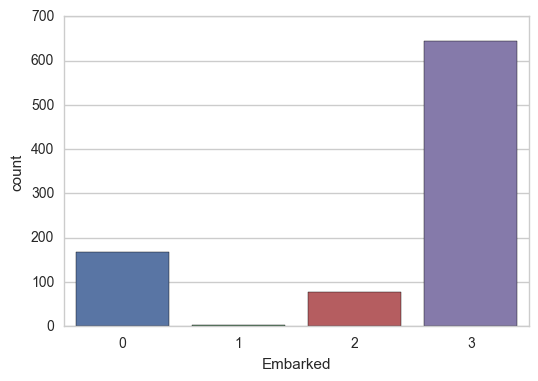

In [77]:
sns.countplot(x='Embarked',data= dt)

In [78]:
print(dt.groupby('Embarked').size())

Embarked
0    168
1      2
2     77
3    644
dtype: int64


In [79]:
dt.Survived.value_counts().plot(kind='bar')

plt.xlabel('Class')
plt.ylabel('Frequency')

AttributeError: 'DataFrame' object has no attribute 'Survived'

In [ ]:
print(dt.groupby('Class').size())

In [ ]:
sns.countplot('Sex',data= dt,hue='Pclass')

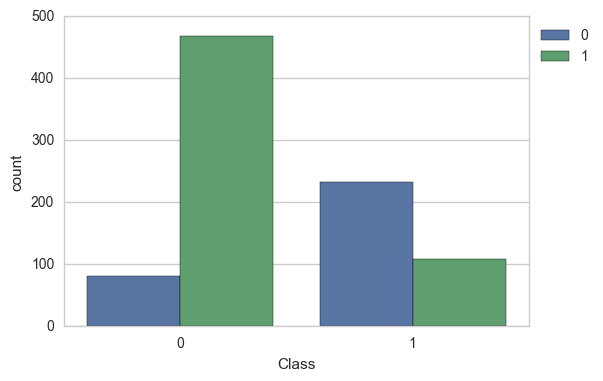

In [80]:
sns.countplot(x='Class',  data= dt, hue='Sex')
plt.legend(bbox_to_anchor=(1,1), loc=2)

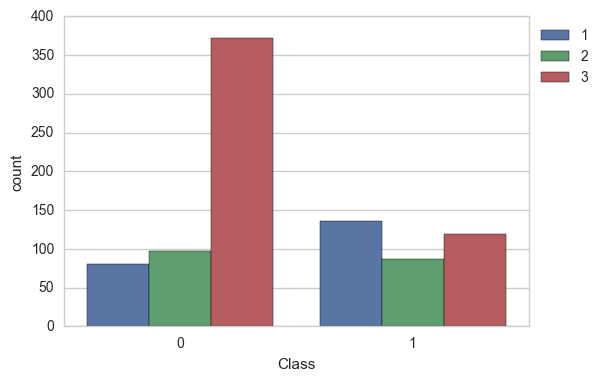

In [81]:
sns.countplot(x='Class',  data= dt, hue='Pclass')
plt.legend(bbox_to_anchor=(1,1), loc=2)

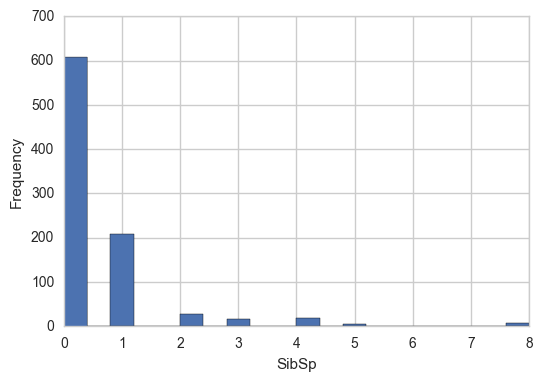

In [82]:
plt.figure()
plt.hist(dt['SibSp'], bins=20)
plt.xlabel('SibSp')
plt.ylabel('Frequency')

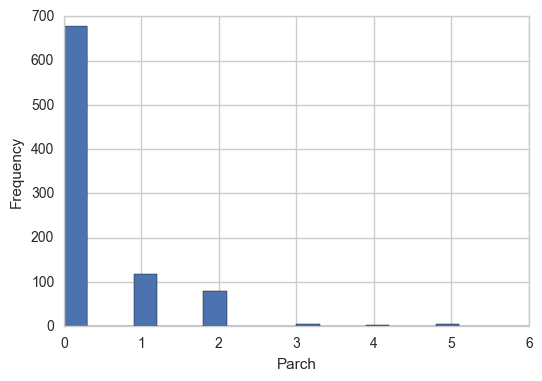

In [83]:
plt.figure()
plt.hist(dt['Parch'], bins=20)
plt.xlabel('Parch')
plt.ylabel('Frequency')

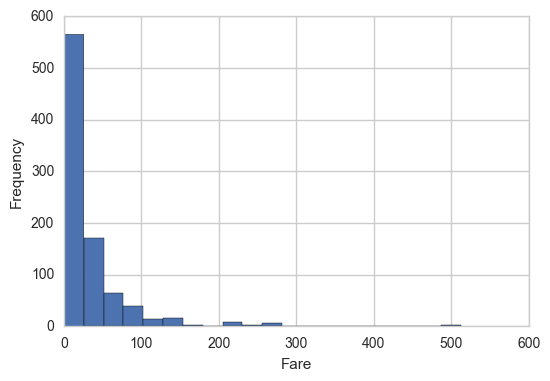

In [84]:
 plt.figure()
plt.hist(dt['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Algorithm baseline: Evaluation

In [86]:
#split data into training and test set
arr = dt.values
X = arr[:,0:7]
Y = arr[:,7]
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=2)


In [89]:
model_selection = []

model_selection.append(('Decision Tree', DecisionTreeClassifier()))
model_selection.append(('Naiye bayes', GaussianNB()))
model_selection.append(('Support vector', SVC()))

In [90]:
final_output = []
names = []
for name, model in model_selection:
    scores = cross_val_score(model,X_train,y_train, cv=10,scoring='accuracy')
    final_output.append(scores)
    names.append(name)
    final = "%s: %f (%f)" % (name,scores.mean(),scores.std())
    print(final)

Decision Tree: 0.794356 (0.033901)
Naiye bayes: 0.779811 (0.041638)
Support vector: 0.690412 (0.042848)


# Tuning Parameters 

In [93]:

clf  = DecisionTreeClassifier( criterion = "gini", random_state=2,max_depth =2)
scores = cross_val_score(clf,X_train, y_train, cv=10, scoring = 'accuracy')
print("%f (%f) " % (scores.mean(), scores.std()))

0.800835 (0.041923) 


In [94]:
clf = DecisionTreeClassifier( criterion = "gini", random_state=4, max_depth = 4)
scores = cross_val_score(clf,X_train, y_train, cv=10, scoring = 'accuracy')
print("%f (%f) " % (scores.mean(), scores.std()))

0.811919 (0.045474) 


In [95]:
clf = DecisionTreeClassifier( criterion = "entropy", random_state=8,max_depth = 8 )
scores = cross_val_score(clf,X_train, y_train, cv=10, scoring = 'accuracy')
print("%f (%f) " % (scores.mean(), scores.std()))

0.813664 (0.057065) 


In [96]:
clf = DecisionTreeClassifier( criterion = "entropy", random_state=9, max_depth = 9)
scores = cross_val_score(clf,X_train, y_train, cv=10, scoring = 'accuracy')
print("%f (%f) " % (scores.mean(), scores.std()))

0.811947 (0.052602) 


# Final Model

In [100]:
# prepare the model

clf = DecisionTreeClassifier( criterion = "gini", random_state=4, max_depth = 4)
clf.fit(X_train, y_train)
# accuracy on test set

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.798507462687
[[144  16]
 [ 38  70]]
             precision    recall  f1-score   support

          0       0.79      0.90      0.84       160
          1       0.81      0.65      0.72       108

avg / total       0.80      0.80      0.79       268

